<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_04_Estadistica/EjercicioN38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

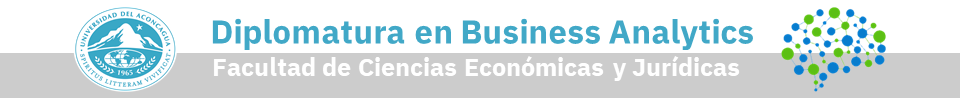

<center/>

<center>
<font color="#41a8c7">
<h2><b>
Series de tiempo-Serie no estacional-Modelo SARIMA
</font>
</center>

**Ejercicio Nº38** En una tienda de venta de artículos electrónicos, se quiere proyectar las ventas del próximo año. Usando los  modelos de series de tiempo haga la predicción de ventas para el próximo año. Recuerde que debe trabajar los datos transformados en logaritmo. Tenga en cuenta que la serie va del 2017 al 2020 y cada observación es cada tres meses, es decir puede haber estacionalidad cada tres meses. Los datos están en miles de dólares.

Instalar librería

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Cargar librería

In [ ]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Cargar datos

In [ ]:
ventas=c(48, 41, 60, 65, 58, 52, 68, 74, 60, 56, 75, 78,63,59,80,84)

In [ ]:
datos.ts = ts(ventas, start = c(2017,1), frequency = 4)

datos.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2017,48,41,60,65
2018,58,52,68,74
2019,60,56,75,78
2020,63,59,80,84


Gráficar

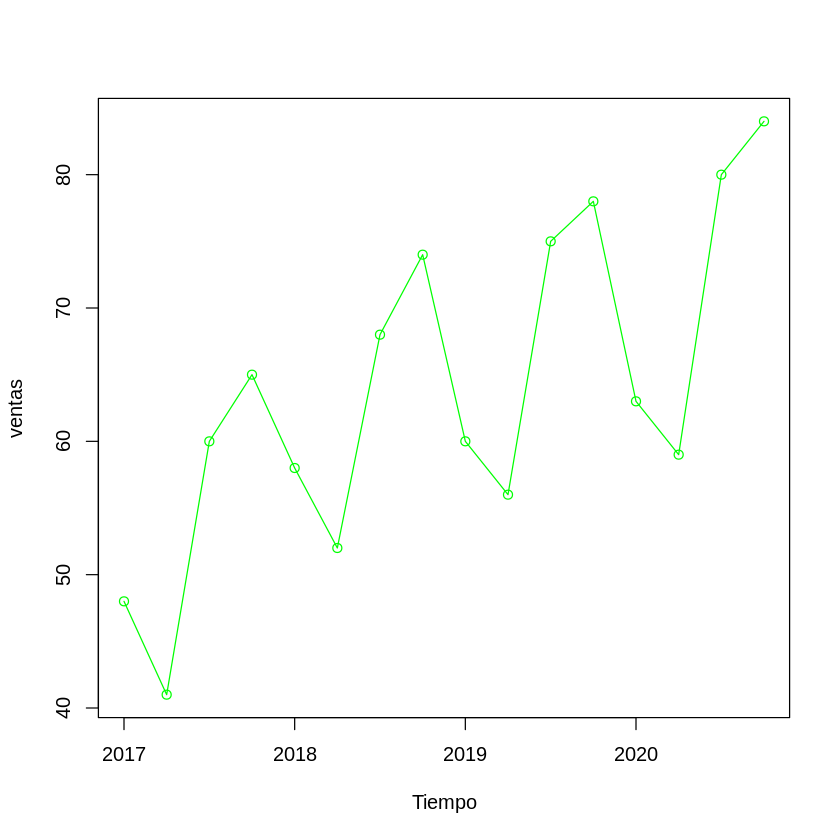

In [ ]:
plot(datos.ts, ylab="ventas", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

Transformar los datos en logaritmo (Cuando se trabaja con datos reales se debe usar siempre logaritmo)

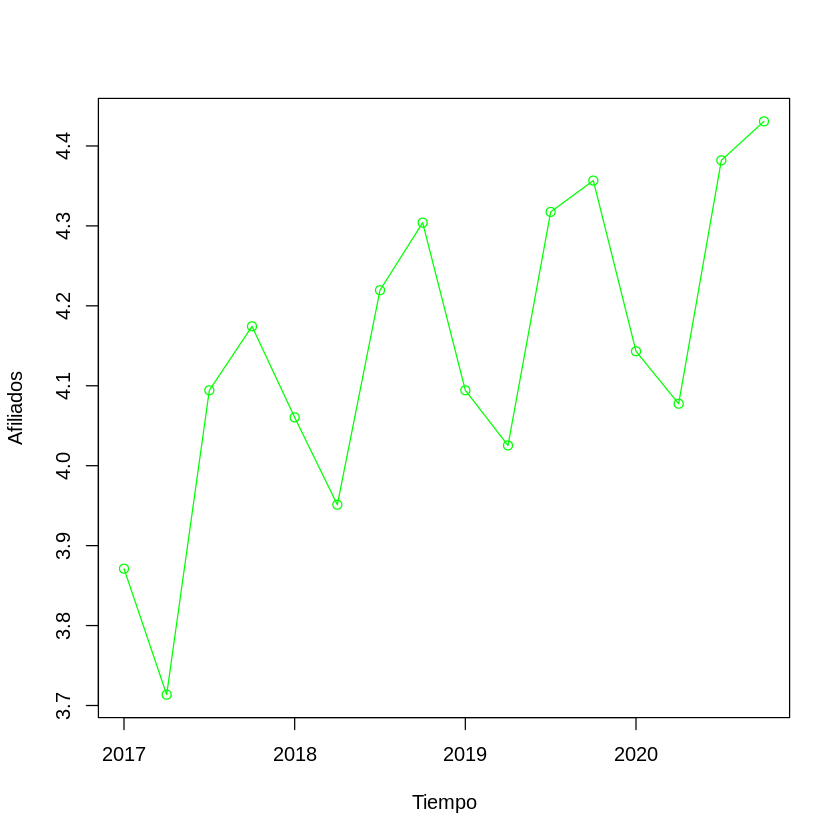

In [ ]:
datos.ts = log(datos.ts)
plot(datos.ts, ylab="Afiliados", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

Estimar el modelo SARIMA

In [ ]:
fit=auto.arima(datos.ts,seasonal = T,ic = c("aicc"), stepwise=T, allowdrift = T)
summary(fit)

Series: datos.ts 
ARIMA(0,1,0)(0,1,0)[4] 

sigma^2 estimated as 0.002616:  log likelihood=17.11
AIC=-32.22   AICc=-31.77   BIC=-31.82

Training set error measures:
                       ME       RMSE        MAE        MPE      MAPE      MASE
Training set -0.007495255 0.04241241 0.02578897 -0.1742935 0.6201345 0.2622583
                   ACF1
Training set -0.4111705


Hacer la predicción para el próximo año

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021 Q1       4.217243 4.151690 4.282796 4.116988 4.317497
2021 Q2       4.151645 4.058939 4.244351 4.009864 4.293427
2021 Q3       4.456135 4.342593 4.569676 4.282488 4.629781
2021 Q4       4.504925 4.373819 4.636031 4.304415 4.705434

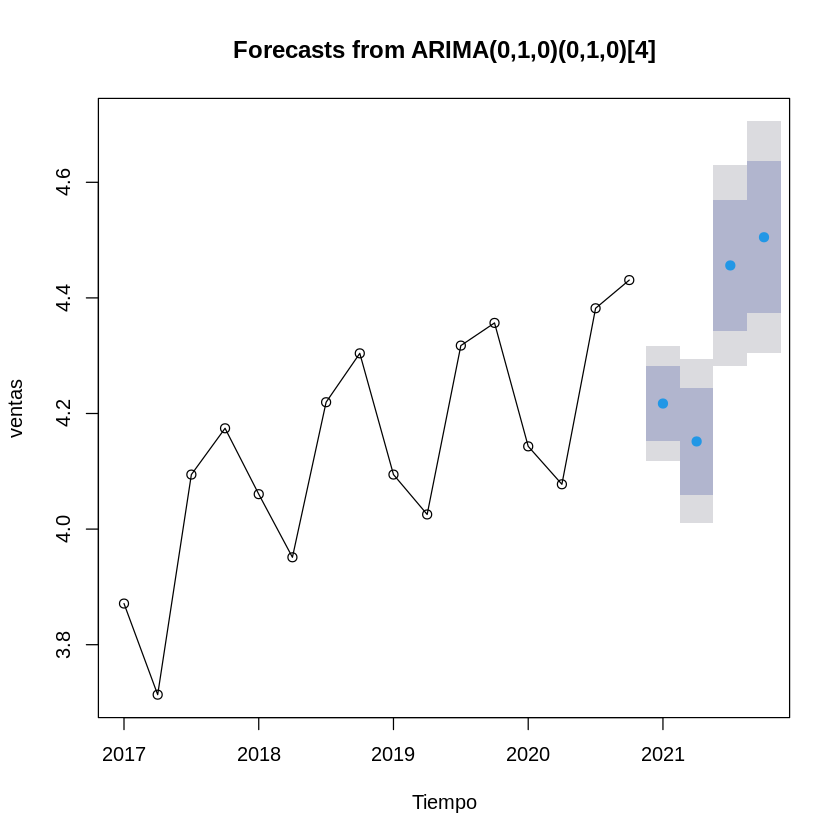

In [ ]:
plot(forecast(fit, 4),ylab="ventas", xlab="Tiempo",type="o",lwd=1,pch=1,cex=1)
forecast(fit, h=4)

Invertir el logaritmo

In [ ]:
predic.log=forecast(fit, h=4)

exp(predic.log$mean)
exp(predic.log$lower)
exp(predic.log$upper)

,Qtr1,Qtr2,Qtr3,Qtr4
2021,67.84615,63.53846,86.15385,90.46154


,80%,95%
2021 Q1,63.54127,61.37411
2021 Q2,57.91286,55.13936
2021 Q3,76.90674,72.42043
2021 Q4,79.34606,74.02593


,80%,95%
2021 Q1,72.44269,75.00070
2021 Q2,69.71053,73.21695
2021 Q3,96.51281,102.49160
2021 Q4,103.13417,110.54627
